# Projet

In [1]:
import pandas as pd
import numpy as np

Téléchargez les trois fichiers “superficie.csv” / “nombre_de_sdb.csv” / “nombre_de_chambres.csv”

Importez les trois datasets

Donnez un nom de colonne à ces trois datasets

Fusionner ces trois datasets un seul dataframe (on fera une fusion simplement par index) qu’on nommera dataset

In [2]:
superficie=pd.read_csv("superficie.csv",header=None)

In [3]:
nombre_de_sdb=pd.read_csv("nombre_de_sdb.csv",header=None)

In [4]:
nombre_de_chambres=pd.read_csv("nombre_de_chambres.csv",header=None)

In [5]:
superficie=superficie.rename(columns={0:"id",1:"superficie"})
nombre_de_sdb=nombre_de_sdb.rename(columns={0:"id",1:"nombre_de_sdb"})
nombre_de_chambres=nombre_de_chambres.rename(columns={0:"id",1:"nombre_de_chambres"})

In [6]:
print("Superficie : \n {} \n Nombre de sdb : \n {} \n Nombre de chambres \n {}".format(superficie.head(),nombre_de_sdb.head(),nombre_de_chambres.head()))

Superficie : 
    id  superficie
0   0       28844
1   1       27667
2   2       14742
3   3       28089
4   4       11713 
 Nombre de sdb : 
    id  nombre_de_sdb
0   0              2
1   1              1
2   2              1
3   3              3
4   4              1 
 Nombre de chambres 
    id  nombre_de_chambres
0   0                   1
1   1                   4
2   2                   1
3   3                   4
4   4                   2


In [7]:
dataset=nombre_de_chambres.join(nombre_de_sdb.set_index("id"),on="id")

In [8]:
dataset=dataset.join(superficie.set_index("id"),on="id")

In [9]:
dataset.head()

,id,nombre_de_chambres,nombre_de_sdb,superficie
0,0,1,2,28844
1,1,4,1,27667
2,2,1,1,14742
3,3,4,3,28089
4,4,2,1,11713


Quelle est la superficie moyenne des maisons de notre dataset ?

In [10]:
dataset.superficie.mean()

20439.77

Quelle est le nombre de chambre médian et moyenne ?


In [11]:
dataset.nombre_de_chambres.mean()

2.42

In [12]:
dataset.nombre_de_chambres.median()

2.0

Nous un nouveau dataset “house_price.csv” que nous voudrions intégrer à notre dataset 

Cette fois nous voudrions fusionner les index avec les id du dataset.

Importez house_price.csv dans une variable qu’on nommera house_price

Créez un id pour dataset qui sera égal à l’index de dataset

Fusionnez house_price à dataset 

In [13]:
house_price=pd.read_csv("house_price.csv")

In [14]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
Unnamed: 0     100 non-null int64
id             100 non-null int64
house_price    100 non-null float64
dtypes: float64(1), int64(2)
memory usage: 2.4 KB


In [15]:
house_price.head()

,Unnamed: 0,id,house_price
0,0,14,1918154.0
1,1,30,739142.0
2,2,70,1621938.0
3,3,77,1319862.0
4,4,50,146250.0


In [16]:
dataset=dataset.join(house_price.set_index("id"),on="id")

In [17]:
dataset.head()

,id,nombre_de_chambres,nombre_de_sdb,superficie,Unnamed: 0,house_price
0,0,1,2,28844,32,1421908.0
1,1,4,1,27667,71,1305091.0
2,2,1,1,14742,65,164373.0
3,3,4,3,28089,88,1441714.0
4,4,2,1,11713,49,108290.0


In [18]:
dataset= dataset.drop(["Unnamed: 0"],axis=1)

In [19]:
dataset.head()

,id,nombre_de_chambres,nombre_de_sdb,superficie,house_price
0,0,1,2,28844,1421908.0
1,1,4,1,27667,1305091.0
2,2,1,1,14742,164373.0
3,3,4,3,28089,1441714.0
4,4,2,1,11713,108290.0


In [20]:
pd.options.display.float_format = '{:.2f}'.format

Quel est le coût moyen d’une maison ?

Quel est le coût moyen par chambre ?


In [21]:
dataset.house_price.mean()

767747.87

In [22]:
((dataset.house_price)/(dataset.nombre_de_chambres)).mean()

425415.17083333334

In [23]:
dataset.groupby("nombre_de_chambres").mean()

,id,nombre_de_sdb,superficie,house_price
nombre_de_chambres,,,,
1,52.26,1.87,22798.70,980774.87
2,57.39,2.00,19001.48,642086.26
3,44.56,2.04,19538.04,645904.59
4,40.32,1.89,21212.32,888045.63


 Le coût moyen par chambre ne nous apprend pas grand chose.
 
Tentons de faire des catégories de superficie

Créez une nouvelle colonne dans votre dataset qu’on appellera taille_maison

Créez trois catégories “très grande” / “grande” / “moyenne” / “petite” / “très petite” qui respectivement correspondront à :

    “une maison dont la taille est supérieure à 25 000 sqrt_feet”
     “une maison dont la taille est comprise entre 20 000 et 25 000 sqrt_feet”
    “une maison dont la taille est comprise entre 15 000 et 20 000 sqrt_feet”
     “une maison dont la taille est comprise entre 10 000 et 15 000 sqrt_feet” 
    “une maison dont la taille est inférieure à 10 000 sqrt_feet”

Remplissez les lignes correspondantes dans la colonne taille_maison

In [24]:
dataset["taille_maison"]=0

In [25]:
for i in range(0,len(dataset)):
    if dataset.iloc[i,3]>25000:
        dataset.iloc[i,5]="Très Grande"
    elif dataset.iloc[i,3] in range(20000,25000):
        dataset.iloc[i,5]="Grande"
    elif dataset.iloc[i,3] in range (15000,20000):
        dataset.iloc[i,5]="Moyenne"
    elif dataset.iloc[i,3] in range (10000,15000):
        dataset.iloc[i,5]="Petite"
    elif dataset.iloc[i,3] < 10000:
        dataset.iloc[i,5]="Très Petite"
    

In [26]:
dataset.head(10)

,id,nombre_de_chambres,nombre_de_sdb,superficie,house_price,taille_maison
0,0,1,2,28844,1421908.00,Très Grande
1,1,4,1,27667,1305091.00,Très Grande
2,2,1,1,14742,164373.00,Petite
3,3,4,3,28089,1441714.00,Très Grande
4,4,2,1,11713,108290.00,Petite
5,5,4,3,28591,1703033.00,Très Grande
6,6,3,3,17385,340284.00,Moyenne
7,7,3,2,26197,1236645.00,Très Grande
8,8,3,2,17611,257405.00,Moyenne
9,9,3,3,12841,157433.00,Petite


In [27]:
dataset.describe()

,id,nombre_de_chambres,nombre_de_sdb,superficie,house_price
count,100.00,100.00,100.00,100.00,100.00
mean,49.50,2.42,1.96,20439.77,767747.87
std,29.01,1.05,0.80,6225.89,609736.23
min,0.00,1.00,1.00,10198.00,101448.00
25%,24.75,2.00,1.00,14709.75,189125.25
50%,49.50,2.00,2.00,20829.00,588016.50
75%,74.25,3.00,3.00,26125.75,1239922.75
max,99.00,4.00,3.00,29931.00,1992653.00


Quel est le coût moyen d’une maison en fonction de sa catégorie de superficie ?

In [28]:
dataset.groupby("taille_maison").mean()

,id,nombre_de_chambres,nombre_de_sdb,superficie,house_price
taille_maison,,,,,
Grande,54.83,2.26,1.87,22282.91,732538.52
Moyenne,54.00,2.68,1.89,17590.58,325694.79
Petite,50.58,2.46,1.96,12163.96,156138.69
Très Grande,42.12,2.34,2.06,27530.81,1552456.06


Visualisez vos résulats sur Seaborn

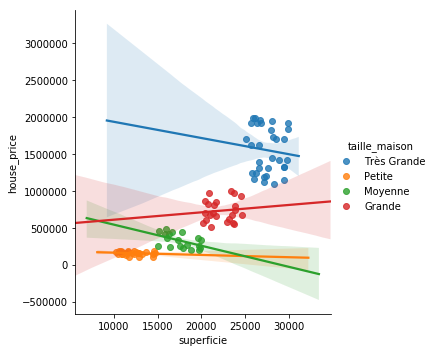

In [31]:
import seaborn as sns
sns.lmplot(x = "superficie", y="house_price",hue="taille_maison", data = dataset)

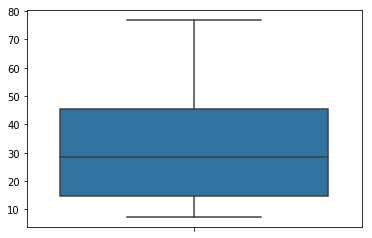

In [30]:
sns.boxplot(y=(dataset["house_price"]/dataset["superficie"]),data=dataset)